In [180]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import scipy.linalg
from scipy.linalg import hankel
import random
import os
import pickle


In [181]:
directory = r"C:\Users\chiar\Documents\tesi IBEC doc\script\DenoisingDeepLearning\DenoisingData"
folders = ["NoNoisy", "Noisy"]

for folder in folders:
    folder_path = os.path.join(directory, folder)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder '{folder}' created.")
    else:
        print(f"Folder '{folder}' already exists.")



Folder 'NoNoisy' already exists.
Folder 'Noisy' already exists.


In [182]:
dirNoisy= r"C:\Users\chiar\Documents\tesi IBEC doc\script\DenoisingDeepLearning\DenoisingData\Noisy"
dirNoNoisy = r"C:\Users\chiar\Documents\tesi IBEC doc\script\DenoisingDeepLearning\DenoisingData\NoNoisy"

dirs = [dirNoisy, dirNoNoisy]
folders = ["NoisyPar", "NoNoisyPar"]

for directory, folder in zip(dirs,folders):
    folder_path = os.path.join(directory, folder)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder '{folder}' created.")
    else:
        print(f"Folder '{folder}' already exists.")


Folder 'NoisyPar' already exists.
Folder 'NoNoisyPar' already exists.


In [191]:
np.random.seed(42)

# Data Set creation
# Sample configuration
# Sample - wide configuration
num_samples = 20000

# Lenght different signal 
size_signal = [1000] * num_samples
#size_signal = np.random.randint(1000, 90000,  size=(num_samples,), dtype=int,)
num_nucl = np.random.randint(1, 5,  size=(num_samples,), dtype=int,)

# Containers for samples and subsamples
samples = []
ys = []
t = []

parameters =[]
As = []
f0s = []
T2s = []
fids=[]

In [192]:
valT2 = [0.04, 0.05, 0.06, 0.075,0.08, 0.09,1, 2, 2.1, 2.3]
# valT2 = [2.1,  0.08, 0.075]

In [168]:
t =  np.arange(0, 3, 0.01)
len(t)

300

GENERATION SAMPLE NO-NOISY

In [209]:
# Generate samples
for k in range(0,2): 
  samples=[]
  parameters =[]
  for i in range(0, 1):
    x_val = np.linspace(1, size_signal[i],size_signal[i], dtype=int)
    
    # fs = np.random.randint(3000,10000, dtype=int,)      # sampling frequency 
    # fs = 2 * 625
    # freq = np.linspace(-fs, fs, len(x_val))             # frequency 
    # t = np.linspace(0, 1/(freq[2]-freq[1]), len(x_val)) # time
    t =  np.arange(0, 5, 0.01)
    # t =  np.arange(0, 4, 0.001)

    y_val = 0
    
    An = []
    f0n =[]
    T2n = []
    fidn = []

    for j in range(0,num_nucl[i]):
      # Random Initialization 
      A = np.random.randint(150,300)  
      An.append(A)                                     # magnitude 
      f0 = np.random.randint(-100, 100)               # larmor frequency 
      f0n.append(f0)
      T2 = random.choices(valT2)                       # relaxation time 
      T2n.append(T2)
      fid = A *  np.exp(-t / T2) * np.cos(2 * np.pi * f0 * t) + A * 1j * np.exp(-t / T2) * np.sin(2 * np.pi * f0 * t)
      fidn.append(fid)
      y_val = y_val+fid
  
  # append tutti i parametri e dopo salvare per ogni spettro

      
    As.append(An)
    f0s.append(f0n)
    T2s.append(T2n)
    fids.append(fidn)

    #ys.append(y_val)
    y_val_fft = np.real(fft(y_val))-np.real(min(fft(y_val)))
    # Append different fid signal
    samples.append((y_val_fft,t))
    parameters.append((As,f0s,T2s))

    # Clear subsample containers for next sample
    ys = []
    t =[]

    As = []
    f0s = []
    T2s = []
    fids=[]
  
  # Save samples in dirNoNoisy
  with open(os.path.join(dirNoNoisy, 'NoNoisy'+str(k+1)+'.pickle'), 'wb') as handle:
    pickle.dump(samples, handle, protocol=pickle.HIGHEST_PROTOCOL) # SUBTRACT MIN VALUE FROM SIGNAL 

  dirNoNoisyPar = r"C:\Users\chiar\Documents\tesi IBEC doc\script\DenoisingDeepLearning\DenoisingData\NoNoisy\NoNoisyPar"
  # Save parameters in dirNoisyPar
  with open(os.path.join(dirNoNoisyPar, 'NoNoisyPar'+str(k+1)+'.pickle'), 'wb') as handle:
    pickle.dump(parameters, handle, protocol=pickle.HIGHEST_PROTOCOL)

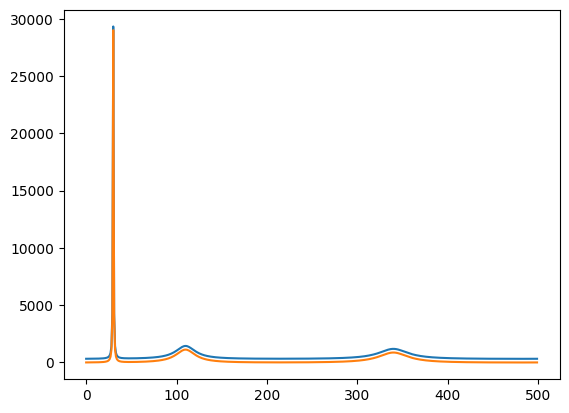

In [213]:
plt.plot(np.real(fft(samples[0][0])))
plt.plot(np.real(fft(samples[0][0]))-np.real(min(fft(samples[0][0]))))

In [194]:
with open(os.path.join(dirNoNoisy, 'NoNoisy1.pickle'), 'rb') as handle:
    b1 = pickle.load(handle)

# with open(os.path.join(dirNoNoisyPar, 'NoNoisyPar1.pickle'), 'rb') as handle:
#     b2 = pickle.load(handle)


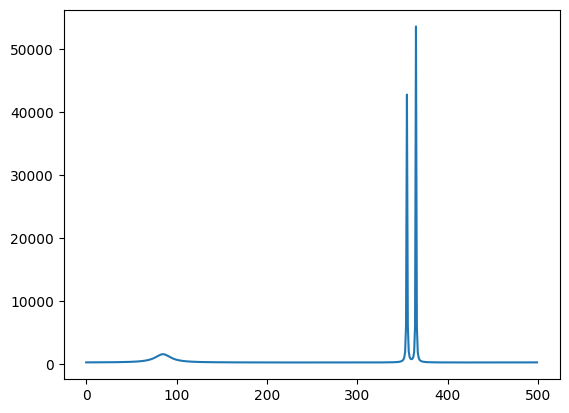

In [187]:
plt.plot(np.real(b1[100][0]))

GENERATION NOISY SAMPLE

In [195]:
# Setting noise parameters 
noise_factor = [i for i in range(3, 6)]
noise_std = [i for i in range(100, 400)]


In [201]:
pure = y_val[i]
noise = np.random.normal(0, 150, len(pure))

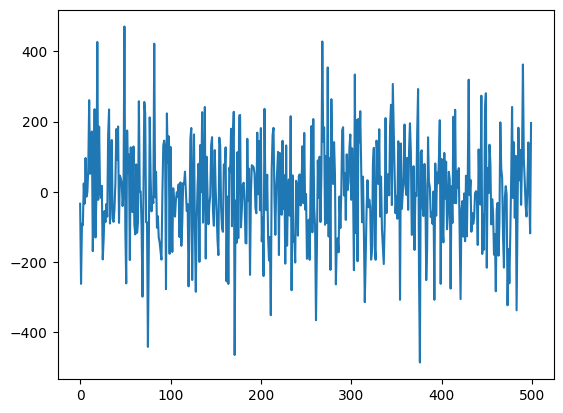

In [202]:
plt.plot(noise)

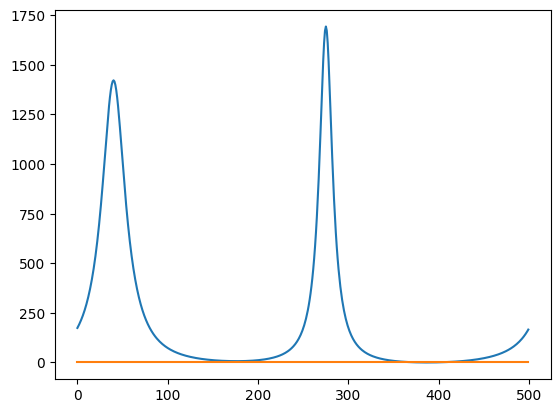

In [208]:
plt.plot(y_val[1000]-min(y_val[1000]))
plt.plot(range(len(y_val[1000])), np.zeros(len(y_val[1000])))

In [196]:
# Add noise to data
noisy_samples = []
noise_parameters = []

# Initialization noise settings 
noiseFactor = []
noiseFactor = []

for j in range(0,2):

  noisy_samples = []
  noise_parameters = []

  # File opening 
  with open(os.path.join(dirNoNoisy, 'NoNoisy'+str(j+1)+'.pickle'), 'rb') as handle:
    b1 = pickle.load(handle)

  y_val = [b1[i][0] for i in range(0,len(b1))]
  t = [b1[i][1] for i in range(0,len(b1))]

  for i in range(0, num_samples):
    # noise parameters selection 
    noiseFactor = random.choices(noise_factor)
    noiseStd = random.choices(noise_std)
    

    pure = y_val[i]
    noise = np.random.normal(0, noiseStd, len(pure))  # Generation Gaussian noise
    signal = pure + noiseFactor * noise          # Application noise to the pure sample
    
    noise_parameters.append([noiseFactor, noiseStd,noise])
    noisy_samples.append([signal,t[i]])           # appent the sample's domain and the noisy sample

    signal = []
    noiseFactor = []
    noiseStd = []
    noise = []
    
  # Save samples in dirNoNoisy
  with open(os.path.join(dirNoisy, 'Noisy'+str(j+1)+'.pickle'), 'wb') as handle:
    pickle.dump(noisy_samples, handle, protocol=pickle.HIGHEST_PROTOCOL)

  dirNoisyPar = r"C:\Users\chiar\Documents\tesi IBEC doc\script\DenoisingDeepLearning\DenoisingData\Noisy\NoisyPar"
  # Save parameters in dirNoisyPar
  with open(os.path.join(dirNoisyPar, 'NoisyPar'+str(j+1)+'.pickle'), 'wb') as handle:
    pickle.dump(noise_parameters, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [197]:
with open(os.path.join(dirNoisy, 'Noisy1.pickle'), 'rb') as handle:
    b2 = pickle.load(handle)

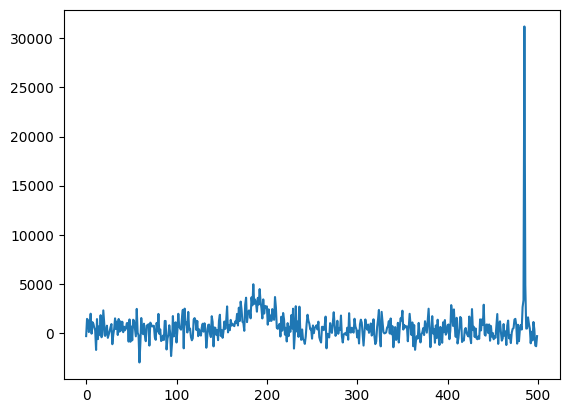

In [178]:
plt.plot(np.real(b2[100][0]))

CHORD method for signal denoising 

C:\Users\chiar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


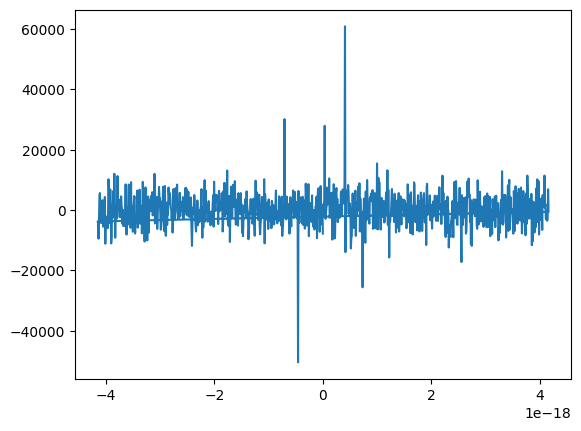

In [361]:
pure = y_val_pure[10]
noise = np.random.normal(0,  800, len(np.real(pure)))  # Generation Gaussian noise

y_val_noisy = pure + 6 * noise          # Application noise to the pure sample
plt.plot(freqs, np.real(y_val_noisy))

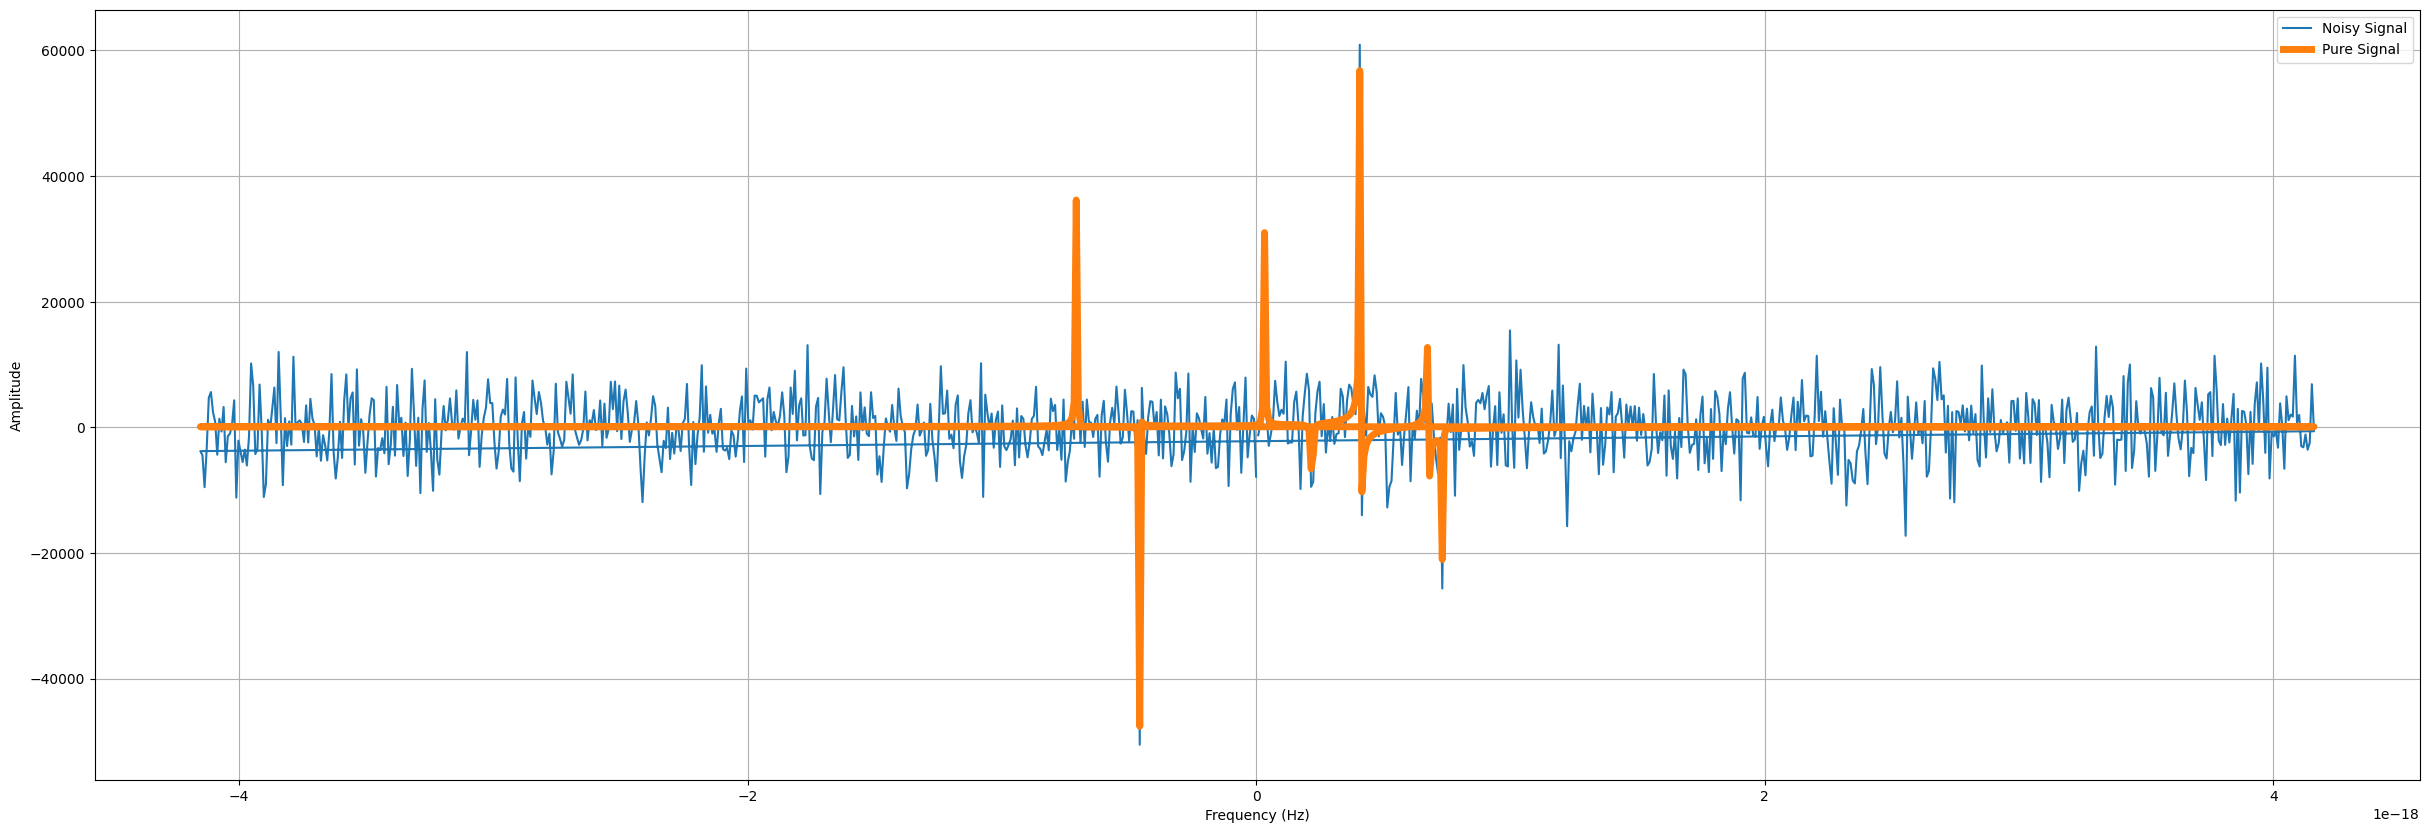

In [365]:
# Plot the signals
plt.figure(figsize=(30, 10))
plt.plot(freqs, np.real(y_val_noisy), label='Noisy Signal')
plt.plot(freqs, np.real((pure)), label='Pure Signal', linewidth=5)  # Increased line width
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [296]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import hankel

from pyproximal.optimization.primal import ADMM
from pyproximal.projection import HankelProj
from pyproximal.proximal import Hankel, QuadraticEnvelopeRankL2


plt.close('all')
np.random.seed(0)

C:\Users\chiar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\chiar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


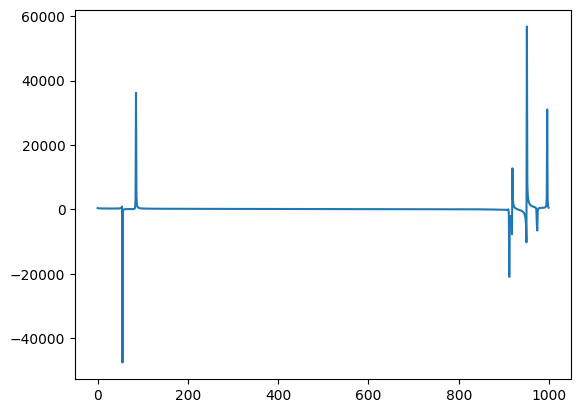

In [369]:
plt.plot(pure)

(385.8580380627269-2353.2250352306164j)

In [379]:
# check rank pure and noisy signals 

# pure signal 
hankel_pure = hankel(pure[:-1], pure[-1:])
# Perform Singular Value Decomposition (SVD)
U, S, V = np.linalg.svd(hankel_pure, full_matrices=False)
#rank = np.linalg.matrix_rank(hankel_mat)

# Compute the rank (number of non-zero singular values)
rank_pure = np.sum(S > 0.1*len(pure))

print("Rank of the Hankel matrix after SVD:", rank_pure)

# noisy signal 
hankel_noisy = hankel(y_val_noisy[:-1], y_val_noisy[-1:])
# Perform Singular Value Decomposition (SVD)
U, S, V = np.linalg.svd(hankel_noisy, full_matrices=False)
#rank = np.linalg.matrix_rank(hankel_mat)

# Compute the rank (number of non-zero singular values)
rank_noisy = np.sum(S > 0.1*len(y_val_noisy))

print("Rank of the Hankel matrix after SVD:", rank_noisy)




Rank of the Hankel matrix after SVD: 1
Rank of the Hankel matrix after SVD: 1


In [392]:
X = np.random.randn(hankel_matrix.shape[0], 10)
frob_norm = np.linalg.norm(hankel_matrix - X, ord='fro')
frob_norm

654617.61965171

In [ ]:
proxf = QuadraticEnvelopeRankL2(X0.shape, r0, X0)
proxg = Hankel(X0.shape)
X_rec_quadenv = ADMM(proxf, proxg, x0=X0.ravel(), tau=0.5, niter=200)[0]
X_rec_quadenv = X_rec_quadenv.reshape(X0.shape)

In [312]:
X0 = np.real(y_val_noisy.reshape(1,len(y_val_noisy)))
r0 = 3

In [284]:
U, S, Vh = np.linalg.svd(X0, full_matrices=False)
X_rec_lowrank = (U[:, :r0] * S[:r0]) @ Vh[:r0, :]

C:\Users\chiar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\chiar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


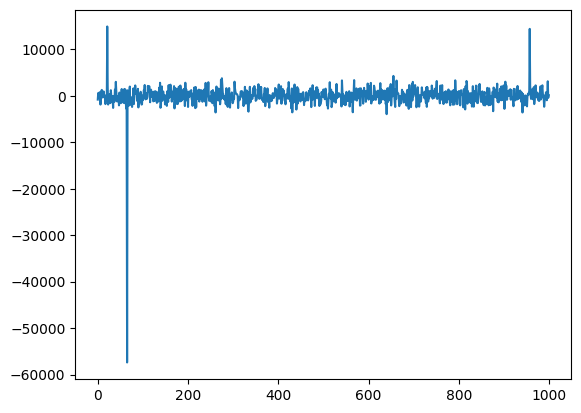

In [287]:
plt.plot(X_rec_lowrank)

In [313]:
proxf = QuadraticEnvelopeRankL2(X0.shape, 3, X0)
proxg = Hankel(X0.shape)
X_rec_quadenv = ADMM(proxf, proxg, x0=X0.ravel(), tau=1, niter=1000)[0]
X_rec_quadenv = X_rec_quadenv.reshape(X0.shape)

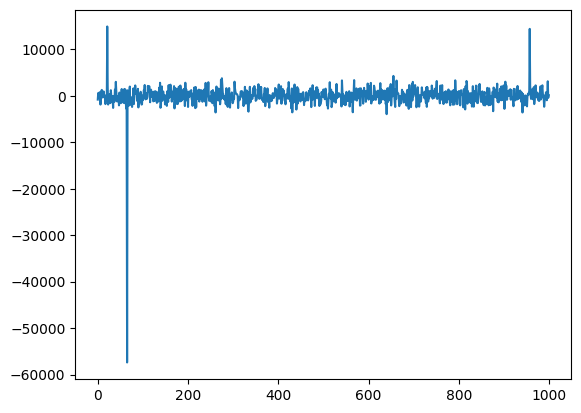

In [315]:
plt.plot(np.transpose(X_rec_quadenv))

In [294]:
np.shape(proxf)

()

In [ ]:
y = y_val_noisy
dx = 10e10
D0 = 1 
Z0 = 0
eta = 10e-8
tau = 1 
beta = 1 

In [ ]:
def sof-thresholdin 

In [414]:
# .. create some fake data ..
np.random.seed(0)

n_samples, n_features = 100, 100
A = np.random.randn(n_samples, n_features)
w = np.random.randn(n_features)
b = A.dot(w) + np.random.randn(n_samples)

def obj_fun(theta, A, b, lamb):
    # .. the lasso objective function ..
    loss = (0.5 / n_samples) * np.linalg.norm(A.dot(theta) - b)**2
    return loss + lamb * np.sum(np.abs(theta))

def lasso_ADMM(A, b, max_iter=100, lam=1.):
    # .. initialize variables ..
    tau = 1.
    n_samples, n_features = A.shape
    rho = np.zeros(n_features)
    u = np.zeros(n_features)

    # .. to keep track of progress ..
    obj_fun_history = []

    # .. cache inverse matrix ..
    AtA_inv = np.linalg.pinv(A.T.dot(A) / n_samples + tau * np.eye(n_features))
    for i in range(max_iter):
        theta = AtA_inv.dot(A.T.dot(b) / n_samples + tau * (rho - u))
        rho = np.fmax(theta + u - lam /tau, 0) - np.fmax(-lam/tau - theta - u, 0)
        u = u + theta - rho
        obj_fun_history.append(obj_fun(theta, A, b, lam))

    return theta, obj_fun_history
    
theta, func_vals = lasso_ADMM(A, b, lam=1.)

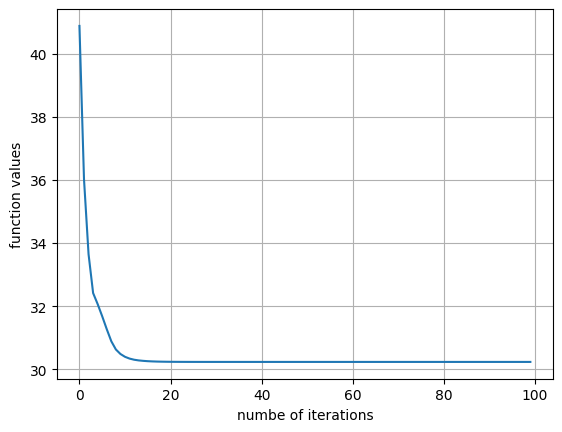

In [415]:
# lets plot the objective values of the function
# to make sure it has converged
plt.plot(func_vals)
plt.ylabel('function values')
plt.xlabel('numbe of iterations')
plt.grid()
plt.show()

AUTOENCODER CREATION

In [210]:
# Model configuration
input_shape = (150, 1)
batch_size = 200           # seemed to work well, offering nice balance between loss value and prediction time (before 150)
no_epochs = 8                # fairly low, but the autoencoder did non improbe anymore after this number (before 6)
train_test_split = 0.3       # 30% for testing(30k)
validation_split = 0.2       # 20% of the training used  for validation (70k). 14,k will be used to validate the model, while 56k will be used for actual training
verbosity = 1
max_norm_value = 2.0         # value worked well in a different scenario, and slightly improved the training results

In [358]:
# Load data
y_val_pure = []
y_val_noisy = []

pure = []
noisy = []

for u in range(0, number_sgn-1):
    with open(os.path.join(dirNoNoisy, 'NoNoisy'+ str(u+1) +'.pickle'), 'rb') as handle:
        b1 = pickle.load(handle)
        pure = [b1[i][0] for i in range(0,len(b1))]
        y_val_pure.append(pure)
        pure = []

    with open(os.path.join(dirNoisy, 'Noisy'+ str(u+1) +'.pickle'), 'rb') as handle:
        b2 = pickle.load(handle)
        noisy  = [b2[i][0] for i in range(0,len(b2))]
        y_val_noisy .append(noisy)
        noisy = []

In [ ]:
y_val_noisy[0]

In [365]:
# Reshape data
y_val_noisy_r = []
y_val_pure_r = []
for i in range(0, number_sgn-1):
    for j in range(0, num_samples):
        noisy_sample = y_val_noisy[i][j]
        pure_sample = y_val_pure[i][j]
        # we normalize the samples to fall in the range [0,1], without this normalization step, odd loss values start popping up
        noisy_sample = (noisy_sample - np.min(noisy_sample)) / (np.max(noisy_sample) - np.min(noisy_sample))
        pure_sample = (pure_sample - np.min(pure_sample)) / (np.max(pure_sample) - np.min(pure_sample))
        y_val_noisy_r.append(noisy_sample)
        y_val_pure_r.append(pure_sample)

C:\Users\chiar\AppData\Local\Temp\ipykernel_15516\2284872191.py:10: RuntimeWarning: invalid value encountered in divide
  pure_sample = (pure_sample - np.min(pure_sample)) / (np.max(pure_sample) - np.min(pure_sample))


In [ ]:
y_val_noisy_r   = np.array(y_val_noisy_r)
y_val_pure_r    = np.array(y_val_pure_r)
noisy_input     = y_val_noisy_r.reshape((y_val_noisy_r.shape[0], y_val_noisy_r.shape[1], 1))
pure_input      = y_val_pure_r.reshape((y_val_pure_r.shape[0], y_val_pure_r.shape[1], 1))